In [1]:
import sys
sys.path.append("..")
from eval.eval_vkitti_gt import EvaluateVKittiGT
import numpy as np

In [2]:
pred_disps = np.load("../data/output/vkitti/midterm/resnet-new-cs-kitti/test/disparities.npy")
pred_disps.shape

(2126, 256, 512)

In [3]:
import matplotlib.pyplot as plt
plt.imshow(pred_disps[0])
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
ev = EvaluateVKittiGT(predicted_disps=pred_disps[:100],
            root_dir="../data/vkitti",
            filenames_file="../resources/filenames/vkitti_test_files.txt")

In [5]:
ev.depth_paths = ev.depth_paths[:100]

In [6]:
result = ev.evaluate()

In [7]:
result.as_csv_line()

'    0.3037,     8.7907,     18.953,      0.541,      0.623,      0.777,      0.844'

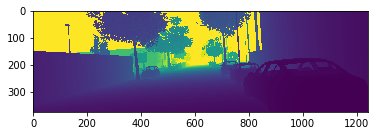

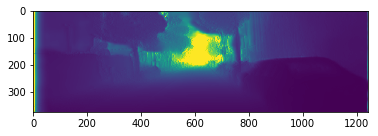

In [12]:
plt.imshow(ev.gt_depths[0])
plt.show()
plt.imshow(ev.pred_depths[0])
plt.show()

(array([198789., 110558.,  40094.,   5988.,  11206.,  12995.,   7562.,
          2962.,   1392.,  74204.]),
 array([ 3.94 , 11.546, 19.152, 26.758, 34.364, 41.97 , 49.576, 57.182,
        64.788, 72.394, 80.   ]),
 <a list of 10 Patch objects>)

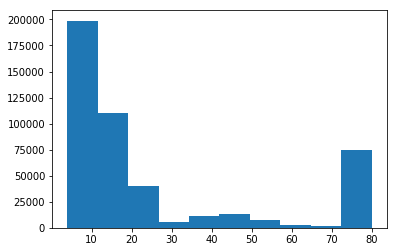

In [22]:
plt.hist(ev.gt_depths[0].flatten())

(array([226471., 136493.,  37275.,  20622.,  12919.,   7411.,   4817.,
          4075.,   3201.,  12466.]),
 array([ 3.8877294, 11.498957 , 19.110184 , 26.72141  , 34.332638 ,
        41.943863 , 49.55509  , 57.166317 , 64.77754  , 72.38877  ,
        80.       ], dtype=float32),
 <a list of 10 Patch objects>)

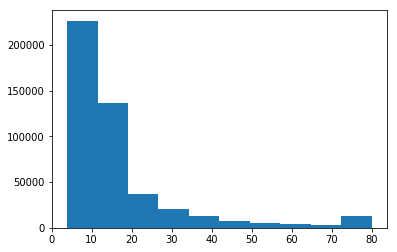

In [23]:
plt.hist(ev.pred_depths[0].flatten())

In [21]:
ev.gt_depths[0].mean()

25.454074761137957

In [19]:
ev.pred_depths[0].mean()

16.484943

In [13]:
import os
root_dir="../data/vkitti"
filenames_file="../resources/filenames/vkitti_test_files.txt"
# load image paths
with open(filenames_file) as filenames:
    image_paths = sorted(
        os.path.join(root_dir, fname.split()[0]) for fname in filenames
    )

# convert to depth paths
depth_paths = [
    "/".join(
        [
            path if path != "vkitti_1.3.1_rgb" else "vkitti_1.3.1_depthgt"
            for path in str.split(image_path, "/")
        ]
    )
    for image_path in image_paths
]

In [14]:
depth_paths

['../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00000.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00001.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00002.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00003.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00004.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00005.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00006.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00007.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00008.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00009.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00010.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00011.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00012.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00013.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00014.png',
 '../data/vkitti/vkitti_1.3.1_depthgt/0001/clone/00015.png',
 '../data/vkitti/vkitti_